# Airlines Dataset
## Data Set Information:

The dataset conveys the information about all the **Airline flights** travelled in india from the Period of **March 2019 to July 2019**.

The Dataset includes **10511 Instances** with **15 Attributes**



## Attribute Information

1. **Airline:** Name of the airline providing the flight:
2. **Date_of_Journey:** (YYYY-MM-DD), Date on which Flight has take off
3. **Source:** Location from where the flight has taken off
4. **Destination:** Place where flight has landed
5. **Route:** Flight Route
6. **Dep_Time:**(MM:SS, 24hr Format) Flight Departure Time
7. **Arrival_Time:**(MM:SS, 24hr Format) Flight Arrival Time
8. **Duration:**('int'h 'int'm) Tike taken by flight to complete the journey
9. **Total_Stops:** Total no of stops in a partiular journey
10. **Price:** Airfare of a particular flight


# Importing Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
sns.set()
le=LabelEncoder()

In [88]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [89]:
df=pd.read_excel(r'/content/Airline Data.xlsx')

In [90]:
df.shape

(10682, 11)

In [91]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [92]:
df.tail()

Airline Date_of_Journey    Source Destination  \
10677     Air Asia       9/04/2019   Kolkata    Banglore   
10678    Air India      27/04/2019   Kolkata    Banglore   
10679  Jet Airways      27/04/2019  Banglore       Delhi   
10680      Vistara      01/03/2019  Banglore   New Delhi   
10681    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10677              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10678              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10679              BLR → DEL    08:20        11:20       3h    non-stop   
10680              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10681  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10677         No info   4107  
10678         No info   4145  
10679         No info   7229  
10680         No info  12648  
10681         No info  11753

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [94]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [95]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#DATA TRANSFORMATION

# Data Cleaning

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df.drop('Additional_Info',axis=1,inplace=True)
df['Route']=df['Destination']+" to "+df['Source']

In [98]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Journey_Day']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month
df['Journey_Year']=df['Date_of_Journey'].dt.year
df['Journey_Weekday']=df['Date_of_Journey'].dt.weekday

<ipython-input-98-379f6ce0edd9>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


Since the 'Date_of_Journey' is in string format, we will convert it into Date format and we will extract day, Month, year and Weekday(Sunday,Monday etc) for further analysis

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Price            10462 non-null  int64         
 10  Journey_Day      10462 non-null  int32         
 11  Journey_Month    10462 non-null  int32         
 12  Journey_Year     10462 non-null  int32         
 13  Journey_Weekday  10462 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(1), o

In [100]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi  New Delhi to Banglore   
1    Air India      2019-05-01   Kolkata    Banglore    Banglore to Kolkata   
2  Jet Airways      2019-06-09     Delhi      Cochin        Cochin to Delhi   
3       IndiGo      2019-05-12   Kolkata    Banglore    Banglore to Kolkata   
4       IndiGo      2019-03-01  Banglore   New Delhi  New Delhi to Banglore   

  Dep_Time  Arrival_Time Duration Total_Stops  Price  Journey_Day  \
0    22:20  01:10 22 Mar   2h 50m    non-stop   3897           24   
1    05:50         13:15   7h 25m     2 stops   7662            1   
2    09:25  04:25 10 Jun      19h     2 stops  13882            9   
3    18:05         23:30   5h 25m      1 stop   6218           12   
4    16:50         21:35   4h 45m      1 stop  13302            1   

   Journey_Month  Journey_Year  Journey_Weekday  
0              3          2019                6  
1              5          2019                2  
2              6          2019                6  
3              5          2019                6  
4              3          2019                4

In [101]:
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_min'].fillna(0,inplace=True)
df['Duration_min'].unique()
df=df.query('Duration_Hour!="5m"')
df['Duration_Hour']=df['Duration_Hour'].astype(int)
df['Duration_min']=df['Duration_min'].astype(int)
df['Duration(min)']=df['Duration_Hour']*60+df['Duration_min']
df['Duration(Hr)']=df['Duration(min)']/60
df['Duration_min'].fillna(0,inplace=True)
df=df.query('Duration_Hour!="5m"')
df.drop(['Duration','Duration_Hour','Duration_min'],axis=1,inplace=True)


<ipython-input-101-47f5d9bf2f6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_Hour']=df['Duration_Hour'].astype(int)
<ipython-input-101-47f5d9bf2f6c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_min']=df['Duration_min'].astype(int)
<ipython-input-101-47f5d9bf2f6c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Since the 'Duration' series is in string format, We will convert the 'Duration' into 2 series in Hours and Mins format and remove the original series


also there is a flight which takes only 5 mins to reach the destination, so we will remove it

In [102]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi  New Delhi to Banglore   
1    Air India      2019-05-01   Kolkata    Banglore    Banglore to Kolkata   
2  Jet Airways      2019-06-09     Delhi      Cochin        Cochin to Delhi   
3       IndiGo      2019-05-12   Kolkata    Banglore    Banglore to Kolkata   
4       IndiGo      2019-03-01  Banglore   New Delhi  New Delhi to Banglore   

  Dep_Time  Arrival_Time Total_Stops  Price  Journey_Day  Journey_Month  \
0    22:20  01:10 22 Mar    non-stop   3897           24              3   
1    05:50         13:15     2 stops   7662            1              5   
2    09:25  04:25 10 Jun     2 stops  13882            9              6   
3    18:05         23:30      1 stop   6218           12              5   
4    16:50         21:35      1 stop  13302            1              3   

   Journey_Year  Journey_Weekday  Duration(min)  Duration(Hr)  
0          2019                6            170      2.833333  
1          2019                2            445      7.416667  
2          2019                6           1140     19.000000  
3          2019                6            325      5.416667  
4          2019                4            285      4.750000

In [103]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.time
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi  New Delhi to Banglore   
1    Air India      2019-05-01   Kolkata    Banglore    Banglore to Kolkata   
2  Jet Airways      2019-06-09     Delhi      Cochin        Cochin to Delhi   
3       IndiGo      2019-05-12   Kolkata    Banglore    Banglore to Kolkata   
4       IndiGo      2019-03-01  Banglore   New Delhi  New Delhi to Banglore   

   Dep_Time Arrival_Time Total_Stops  Price  Journey_Day  Journey_Month  \
0  22:20:00     01:10:00    non-stop   3897           24              3   
1  05:50:00     13:15:00     2 stops   7662            1              5   
2  09:25:00     04:25:00     2 stops  13882            9              6   
3  18:05:00     23:30:00      1 stop   6218           12              5   
4  16:50:00     21:35:00      1 stop  13302            1              3   

   Journey_Year  Journey_Weekday  Duration(min)  Duration(Hr)  
0          2019                6            170      2.833333  
1          2019                2            445      7.416667  
2          2019                6           1140     19.000000  
3          2019                6            325      5.416667  
4          2019                4            285      4.750000

1. Since the some of the 'Arrival_Time' series contains both time and date, so we will remove the date part and keep only first part
2. Now both the 'Dep_Time' & 'Arrival_Time' are in string format, we will convert it into time format (hh:mm:ss)

In [104]:
totstop={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(totstop)
Total_Stops=df['Total_Stops'].unique()
Total_Stops

array([0, 2, 1, 3, 4])

since total no of stops in a flight journey, here it is in string format, we will convert it into integers

In [107]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi  New Delhi to Banglore   
1    Air India      2019-05-01   Kolkata    Banglore    Banglore to Kolkata   
2  Jet Airways      2019-06-09     Delhi      Cochin        Cochin to Delhi   
3       IndiGo      2019-05-12   Kolkata    Banglore    Banglore to Kolkata   
4       IndiGo      2019-03-01  Banglore   New Delhi  New Delhi to Banglore   

   Dep_Time Arrival_Time  Total_Stops  Price  Journey_Day  Journey_Month  \
0  22:20:00     01:10:00            0   3897           24              3   
1  05:50:00     13:15:00            2   7662            1              5   
2  09:25:00     04:25:00            2  13882            9              6   
3  18:05:00     23:30:00            1   6218           12              5   
4  16:50:00     21:35:00            1  13302            1              3   

   Journey_Year  Journey_Weekday  Duration(min)  Duration(Hr)  
0          2019                6            170      2.833333  
1          2019                2            445      7.416667  
2          2019                6           1140     19.000000  
3          2019                6            325      5.416667  
4          2019                4            285      4.750000

# EDA

In [109]:
df.describe().T

count                           mean                  min  \
Date_of_Journey    10461  2019-05-04 13:46:45.047318784  2019-03-01 00:00:00   
Total_Stops      10461.0                       0.802218                  0.0   
Price            10461.0                    9025.996845               1759.0   
Journey_Day      10461.0                      13.463914                  1.0   
Journey_Month    10461.0                       4.701654                  3.0   
Journey_Year     10461.0                         2019.0               2019.0   
Journey_Weekday  10461.0                       2.935666                  0.0   
Duration(min)    10461.0                     629.841315                 75.0   
Duration(Hr)     10461.0                      10.497355                 1.25   

                                 25%                  50%  \
Date_of_Journey  2019-03-27 00:00:00  2019-05-15 00:00:00   
Total_Stops                      0.0                  1.0   
Price                         5224.0               8266.0   
Journey_Day                      6.0                 12.0   
Journey_Month                    3.0                  5.0   
Journey_Year                  2019.0               2019.0   
Journey_Weekday                  1.0                  3.0   
Duration(min)                  170.0                505.0   
Duration(Hr)                2.833333             8.416667   

                                 75%                  max          std  
Date_of_Journey  2019-06-06 00:00:00  2019-06-27 00:00:00          NaN  
Total_Stops                      1.0                  4.0     0.660537  
Price                        12341.0              79512.0  4624.358456  
Journey_Day                     21.0                 27.0     8.467583  
Journey_Month                    6.0                  6.0     1.163739  
Journey_Year                  2019.0               2019.0          0.0  
Journey_Weekday                  5.0                  6.0     2.006674  
Duration(min)                  910.0               2860.0   500.685709  
Duration(Hr)               15.166667            47.666667     8.344762

From the Above Table, it is concluded that,



*   Previously, There were total **10682 Rows** in the dataset, but after performing Data Wrangling, there were **221 duplicate values** found & After their removal the total rows turns out to be **10461**


*   The Average price of each flight ticket is Rs 9026. The range shows a huge difference between min value as Rs 1759.0 & max value as Rs 79512.
This shows the evidence of an outlier. This record can be removed.

*   The Average Time taken by each flight is 629 Mins/10.5 Hrs. The range shows a huge difference between min value (75.0 Mins/1.25 Hr)	& max value(500 Mins/8.3 Hr). This shows the evidence of an outlier and can be removed





# Outlier Removal

In [110]:
category=df.select_dtypes(include=['object']).columns
Numerical = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Data:")
print(category)
print("Numerical Data:")
print(Numerical)

Categorical Data:
Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time'],
      dtype='object')
Numerical Data:
['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year', 'Journey_Weekday', 'Duration(min)', 'Duration(Hr)']


Dividing Dataset into 2 parts based on Categorical & Numerical Dat

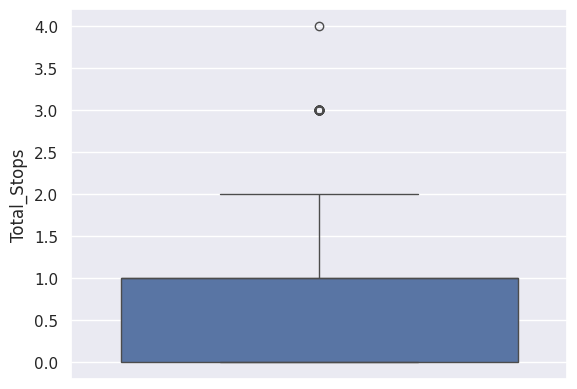

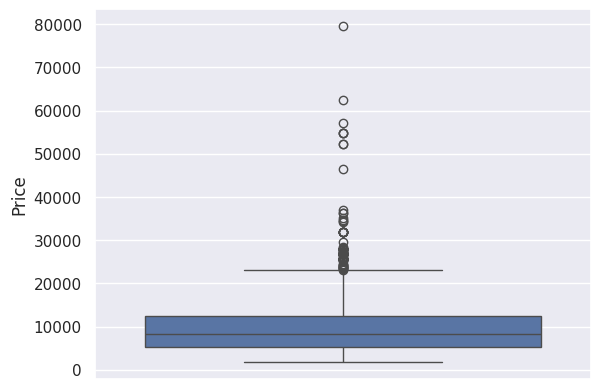

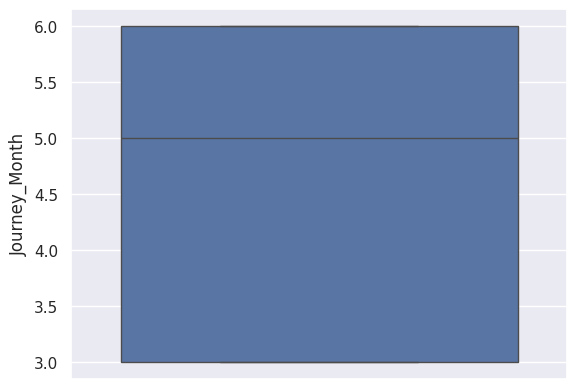

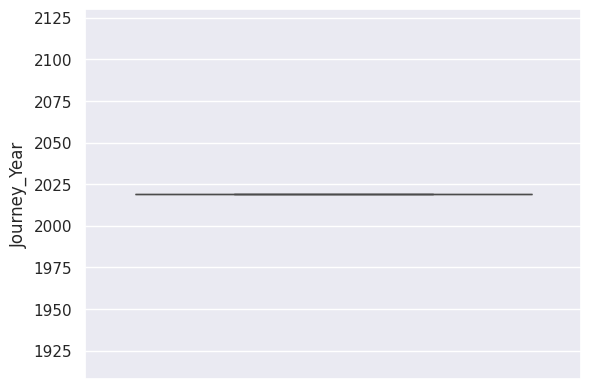

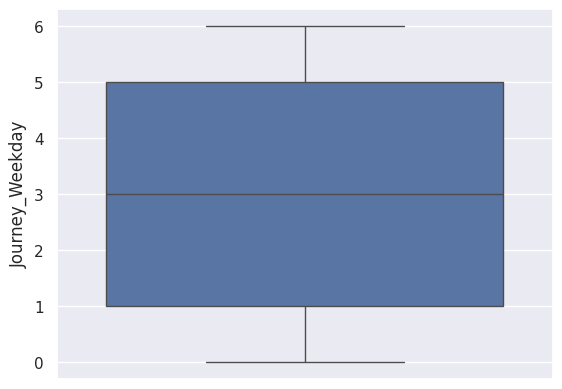

In [111]:
for col in Numerical:
  sns.boxplot(df[col])
  plt.show()

From the Above Box-Plots, it is Evident that, Outliers are present in


*   Total_Stops
*   Price
*   Duration(hr)
*   Duration(min)

Since Total_Stops is a categorical data which was converted into integers, so we can Ignore it

Therefore for Further Analysis, we need to remove Outliers from above Columns





In [112]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [113]:
Q1 = df['Duration(min)'].quantile(0.25)
Q3 = df['Duration(min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration(min)'] >= lower_bound) & (df['Duration(min)'] <= upper_bound)]

In [114]:
Q1 = df['Duration(Hr)'].quantile(0.25)
Q3 = df['Duration(Hr)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration(Hr)'] >= lower_bound) & (df['Duration(Hr)'] <= upper_bound)]

In [115]:
df.describe().T

count                           mean                  min  \
Date_of_Journey    10292  2019-05-05 08:46:55.079673344  2019-03-01 00:00:00   
Total_Stops      10292.0                       0.789059                  0.0   
Price            10292.0                    8805.303051               1759.0   
Journey_Day      10292.0                      13.563545                  1.0   
Journey_Month    10292.0                       4.724252                  3.0   
Journey_Year     10292.0                         2019.0               2019.0   
Journey_Weekday  10292.0                       2.924407                  0.0   
Duration(min)    10292.0                     616.690634                 75.0   
Duration(Hr)     10292.0                      10.278177                 1.25   

                                 25%                  50%  \
Date_of_Journey  2019-04-01 00:00:00  2019-05-15 00:00:00   
Total_Stops                      0.0                  1.0   
Price                         5198.0               8066.5   
Journey_Day                      6.0                 12.0   
Journey_Month                    4.0                  5.0   
Journey_Year                  2019.0               2019.0   
Journey_Weekday                  1.0                  3.0   
Duration(min)                  170.0                500.0   
Duration(Hr)                2.833333             8.333333   

                                 75%                  max          std  
Date_of_Journey  2019-06-06 00:00:00  2019-06-27 00:00:00          NaN  
Total_Stops                      1.0                  4.0     0.652321  
Price                        12192.0              23001.0  4061.638037  
Journey_Day                     21.0                 27.0      8.43081  
Journey_Month                    6.0                  6.0      1.15462  
Journey_Year                  2019.0               2019.0          0.0  
Journey_Weekday                  5.0                  6.0     2.011511  
Duration(min)                  900.0               1995.0   483.114082  
Duration(Hr)                    15.0                33.25     8.051901

There are **169 Outliers** present in the dataset and are removed

# *Overview*

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10292 non-null  object        
 1   Date_of_Journey  10292 non-null  datetime64[ns]
 2   Source           10292 non-null  object        
 3   Destination      10292 non-null  object        
 4   Route            10292 non-null  object        
 5   Dep_Time         10292 non-null  object        
 6   Arrival_Time     10292 non-null  object        
 7   Total_Stops      10292 non-null  int64         
 8   Price            10292 non-null  int64         
 9   Journey_Day      10292 non-null  int32         
 10  Journey_Month    10292 non-null  int32         
 11  Journey_Year     10292 non-null  int32         
 12  Journey_Weekday  10292 non-null  int32         
 13  Duration(min)    10292 non-null  int64         
 14  Duration(Hr)     10292 non-null  float64   

In [118]:
df.shape

(10292, 15)

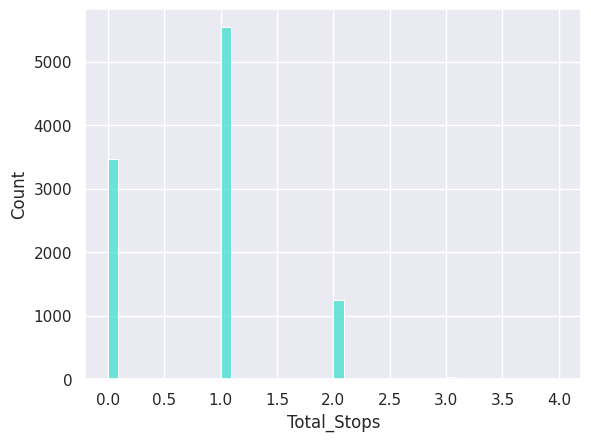

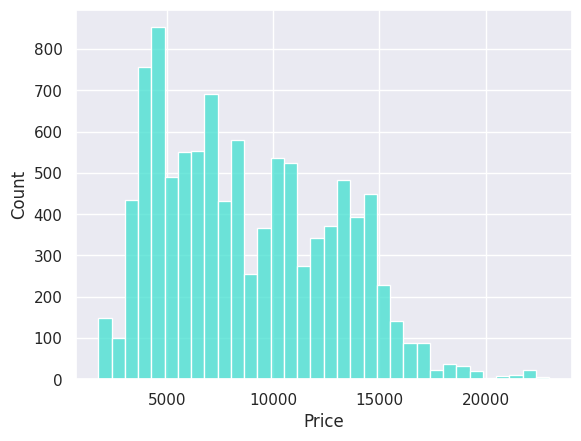

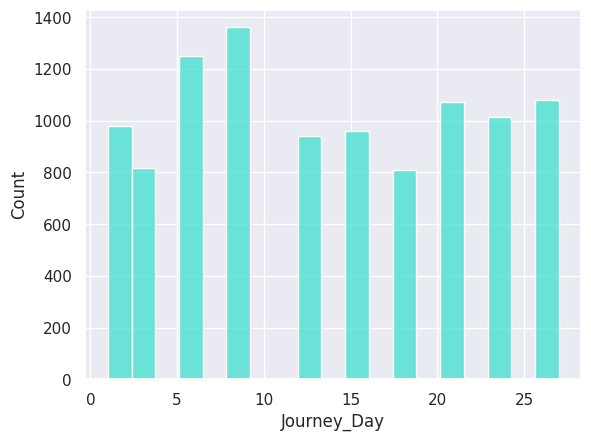

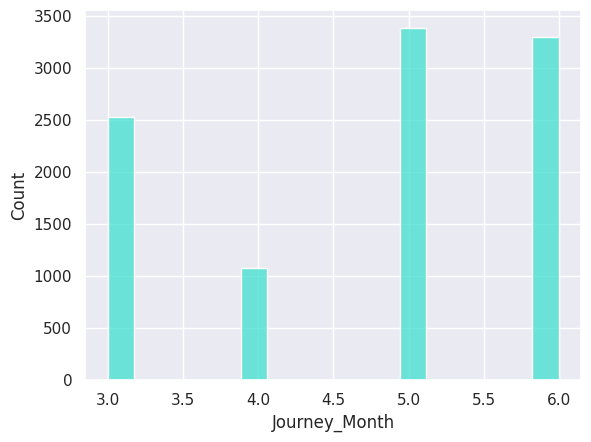

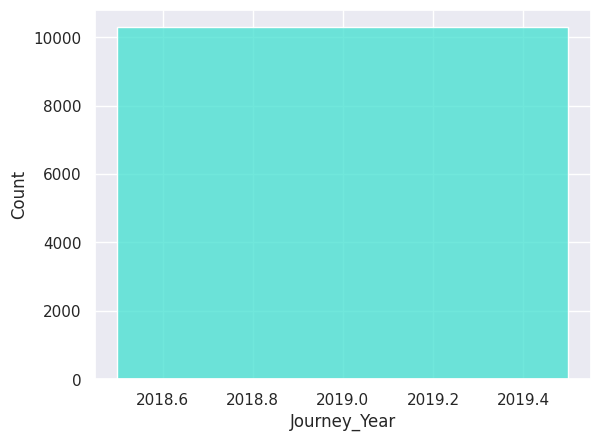

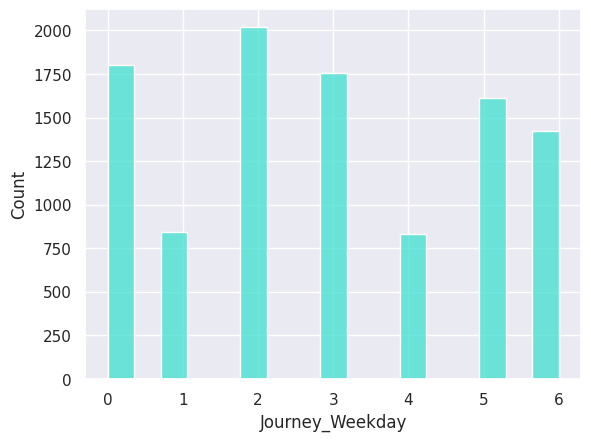

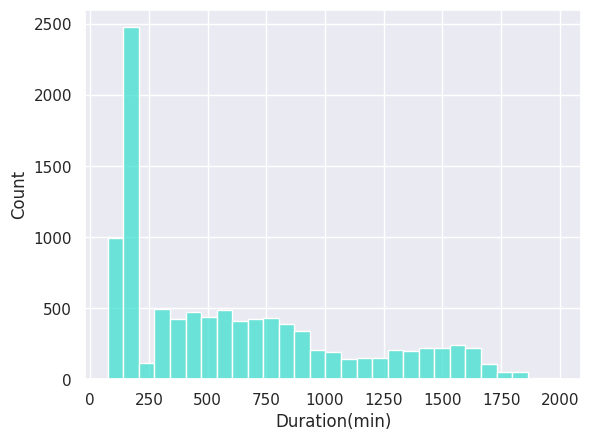

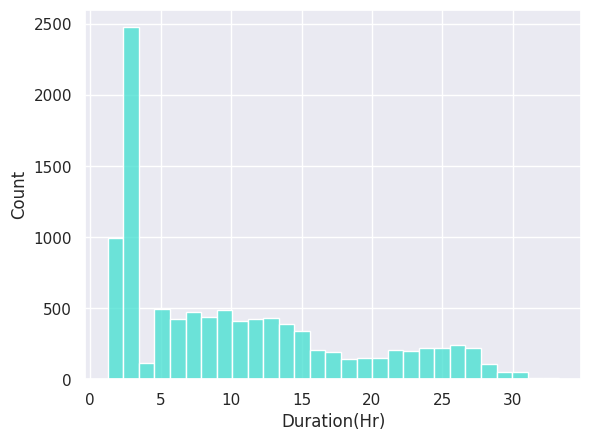

In [121]:
for col in Numerical:
  sns.histplot(df[col],color='Turquoise')
  plt.show()

TOTAL STOPS

In [135]:
df[['Total_Stops']].value_counts()

Total_Stops
1              5550
0              3472
2              1240
3                29
4                 1
Name: count, dtype: int64

In [136]:
(df[['Total_Stops']].value_counts())/len(df['Total_Stops'])*100

Total_Stops
1              53.925379
0              33.734940
2              12.048193
3               0.281772
4               0.009716
Name: count, dtype: float64

In [138]:
df[['Journey_Month']].value_counts()

Journey_Month
5                3383
6                3301
3                2531
4                1077
Name: count, dtype: int64

In [140]:
(df[['Journey_Month']].value_counts())/len(df['Journey_Month'])*100

Journey_Month
5                32.870190
6                32.073455
3                24.591916
4                10.464438
Name: count, dtype: float64

In [141]:
df[['Journey_Weekday']].value_counts()

Journey_Weekday
2                  2020
0                  1799
3                  1758
5                  1614
6                  1424
1                   846
4                   831
Name: count, dtype: int64

In [142]:
(df[['Journey_Weekday']].value_counts())/len(df['Journey_Weekday'])*100

Journey_Weekday
2                  19.626895
0                  17.479596
3                  17.081228
5                  15.682083
6                  13.835989
1                   8.219977
4                   8.074232
Name: count, dtype: float64

In [156]:
df[['Duration(Hr)']].value_counts()

Duration(Hr)
2.833333        544
1.500000        386
2.750000        333
2.916667        332
2.583333        328
3.000000        260
2.333333        238
2.500000        220
2.666667        156
1.416667        135
2.250000        135
2.416667         98
13.333333        88
3.250000         88
7.500000         86
9.500000         83
8.666667         81
13.500000        80
3.083333         78
7.250000         77
7.583333         71
5.500000         71
8.000000         68
7.083333         65
9.000000         64
9.833333         64
5.000000         62
11.750000        62
5.250000         62
11.000000        62
1.333333         61
14.416667        61
6.583333         59
12.166667        57
10.500000        55
5.750000         54
12.750000        54
11.500000        52
7.333333         52
16.083333        52
12.500000        52
4.916667         51
15.166667        50
10.250000        50
8.416667         50
10.000000        49
12.000000        49
12.250000        48
10.416667        47
5.333333         45
11.083333        45
6.250000         43
14.083333        42
8.916667         42
9.250000         42
9.583333         41
9.333333         41
13.000000        41
3.166667         40
17.083333        40
20.166667        39
27.583333        38
5.083333         37
6.500000         37
6.416667         36
14.000000        36
11.250000        36
14.583333        36
8.500000         36
23.666667        36
12.416667        35
15.416667        35
4.500000         35
13.250000        35
4.833333         35
13.416667        35
21.583333        35
27.333333        34
26.583333        33
16.750000        33
15.500000        33
18.333333        33
25.750000        32
22.916667        32
8.333333         31
12.333333        30
12.583333        30
5.416667         30
15.333333        30
27.000000        30
5.916667         30
8.166667         30
26.916667        30
23.833333        30
21.416667        30
24.750000        30
10.333333        29
9.083333         29
26.333333        29
26.166667        29
14.500000        29
7.750000         29
14.333333        29
13.916667        28
23.250000        28
16.250000        28
6.333333         28
9.750000         28
15.000000        28
10.666667        27
24.000000        27
5.166667         27
13.833333        27
12.916667        26
6.083333         26
6.000000         26
7.666667         26
14.916667        26
5.583333         25
21.250000        25
19.416667        25
18.750000        25
28.833333        25
9.166667         25
24.916667        24
16.833333        24
15.666667        24
1.250000         24
6.166667         24
8.583333         24
10.166667        23
7.833333         23
3.666667         23
11.833333        23
7.916667         23
23.583333        23
11.416667        23
28.333333        22
24.833333        22
22.083333        22
20.000000        22
23.500000        22
6.666667         22
23.000000        22
16.916667        22
4.666667         22
25.500000        21
7.000000         21
20.916667        21
26.000000        21
27.083333        21
11.916667        21
4.583333         21
22.500000        21
13.750000        21
22.750000        21
24.500000        20
24.583333        20
23.166667        20
10.916667        20
25.833333        20
11.666667        20
5.666667         20
23.750000        20
16.000000        19
26.833333        19
17.416667        19
21.333333        19
15.916667        19
4.416667         19
19.916667        19
14.833333        19
8.250000         19
25.916667        18
22.166667        18
20.333333        18
12.666667        18
12.083333        18
14.750000        18
27.166667        17
18.166667        17
25.333333        17
24.666667        17
10.583333        17
6.916667         17
8.083333         17
22.000000        17
18.416667        17
22.250000        17
16.166667        16
20.250000        16
20.416667        16
29.333333        15
22.583333        15
26.500000        15
1.583333         15
24.166667        15
30.500000        15
19.083333        15
25.5833

In [155]:
(df[['Duration(Hr)']].value_counts())/len(df['Duration(Hr)'])*100

Duration(Hr)
2.833333        5.285659
1.500000        3.750486
2.750000        3.235523
2.916667        3.225806
2.583333        3.186941
3.000000        2.526234
2.333333        2.312476
2.500000        2.137583
2.666667        1.515740
1.416667        1.311698
2.250000        1.311698
2.416667        0.952196
13.333333       0.855033
3.250000        0.855033
7.500000        0.835600
9.500000        0.806452
8.666667        0.787019
13.500000       0.777303
3.083333        0.757870
7.250000        0.748154
7.583333        0.689856
5.500000        0.689856
8.000000        0.660707
7.083333        0.631558
9.000000        0.621842
9.833333        0.621842
5.000000        0.602410
11.750000       0.602410
5.250000        0.602410
11.000000       0.602410
1.333333        0.592693
14.416667       0.592693
6.583333        0.573261
12.166667       0.553828
10.500000       0.534396
5.750000        0.524679
12.750000       0.524679
11.500000       0.505247
7.333333        0.505247
16.083333       0.505247
12.500000       0.505247
4.916667        0.495531
15.166667       0.485814
10.250000       0.485814
8.416667        0.485814
10.000000       0.476098
12.000000       0.476098
12.250000       0.466382
10.416667       0.456665
5.333333        0.437233
11.083333       0.437233
6.250000        0.417800
14.083333       0.408084
8.916667        0.408084
9.250000        0.408084
9.583333        0.398368
9.333333        0.398368
13.000000       0.398368
3.166667        0.388651
17.083333       0.388651
20.166667       0.378935
27.583333       0.369219
5.083333        0.359503
6.500000        0.359503
6.416667        0.349786
14.000000       0.349786
11.250000       0.349786
14.583333       0.349786
8.500000        0.349786
23.666667       0.349786
12.416667       0.340070
15.416667       0.340070
4.500000        0.340070
13.250000       0.340070
4.833333        0.340070
13.416667       0.340070
21.583333       0.340070
27.333333       0.330354
26.583333       0.320637
16.750000       0.320637
15.500000       0.320637
18.333333       0.320637
25.750000       0.310921
22.916667       0.310921
8.333333        0.301205
12.333333       0.291489
12.583333       0.291489
5.416667        0.291489
15.333333       0.291489
27.000000       0.291489
5.916667        0.291489
8.166667        0.291489
26.916667       0.291489
23.833333       0.291489
21.416667       0.291489
24.750000       0.291489
10.333333       0.281772
9.083333        0.281772
26.333333       0.281772
26.166667       0.281772
14.500000       0.281772
7.750000        0.281772
14.333333       0.281772
13.916667       0.272056
23.250000       0.272056
16.250000       0.272056
6.333333        0.272056
9.750000        0.272056
15.000000       0.272056
10.666667       0.262340
24.000000       0.262340
5.166667        0.262340
13.833333       0.262340
12.916667       0.252623
6.083333        0.252623
6.000000        0.252623
7.666667        0.252623
14.916667       0.252623
5.583333        0.242907
21.250000       0.242907
19.416667       0.242907
18.750000       0.242907
28.833333       0.242907
9.166667        0.242907
24.916667       0.233191
16.833333       0.233191
15.666667       0.233191
1.250000        0.233191
6.166667        0.233191
8.583333        0.233191
10.166667       0.223475
7.833333        0.223475
3.666667        0.223475
11.833333       0.223475
7.916667        0.223475
23.583333       0.223475
11.416667       0.223475
28.333333       0.213758
24.833333       0.213758
22.083333       0.213758
20.000000       0.213758
23.500000       0.213758
6.666667        0.213758
23.000000       0.213758
16.916667       0.213758
4.666667        0.213758
25.500000       0.204042
7.000000        0.204042
20.916667       0.204042
26.000000       0.204042
27.083333       0.204042
11.916667       0.204042
4.583333        0.204042
22.500000       0.204042
13.750000       0.204042
22.750000       0.204042
24.500000       0.194326
24.583333       0.194326
23.166667       0.194326
10.916667   

From the Above Histogram, It is Observed that -

*   Majority of Flights i.e 66% have atleast 1 stop followed by rest are non-stop.
*   ~ 60% of Passengers have purchased the flight tickets, in the range of Rs 4,000 - Rs 6,000.
*   ~ 64% of Flights has taken off in the month of May & June, followed by March and April.
*   Wednesday,Monday and Thursday are the Busiest days in a week, each accounting ~ 18% of total flights.
*   Tuesday and Friday have the lowest number of flights, each accounting for 8% of total flights.
*   Most of flights have taken around 1-4 Hours to complete a Journey






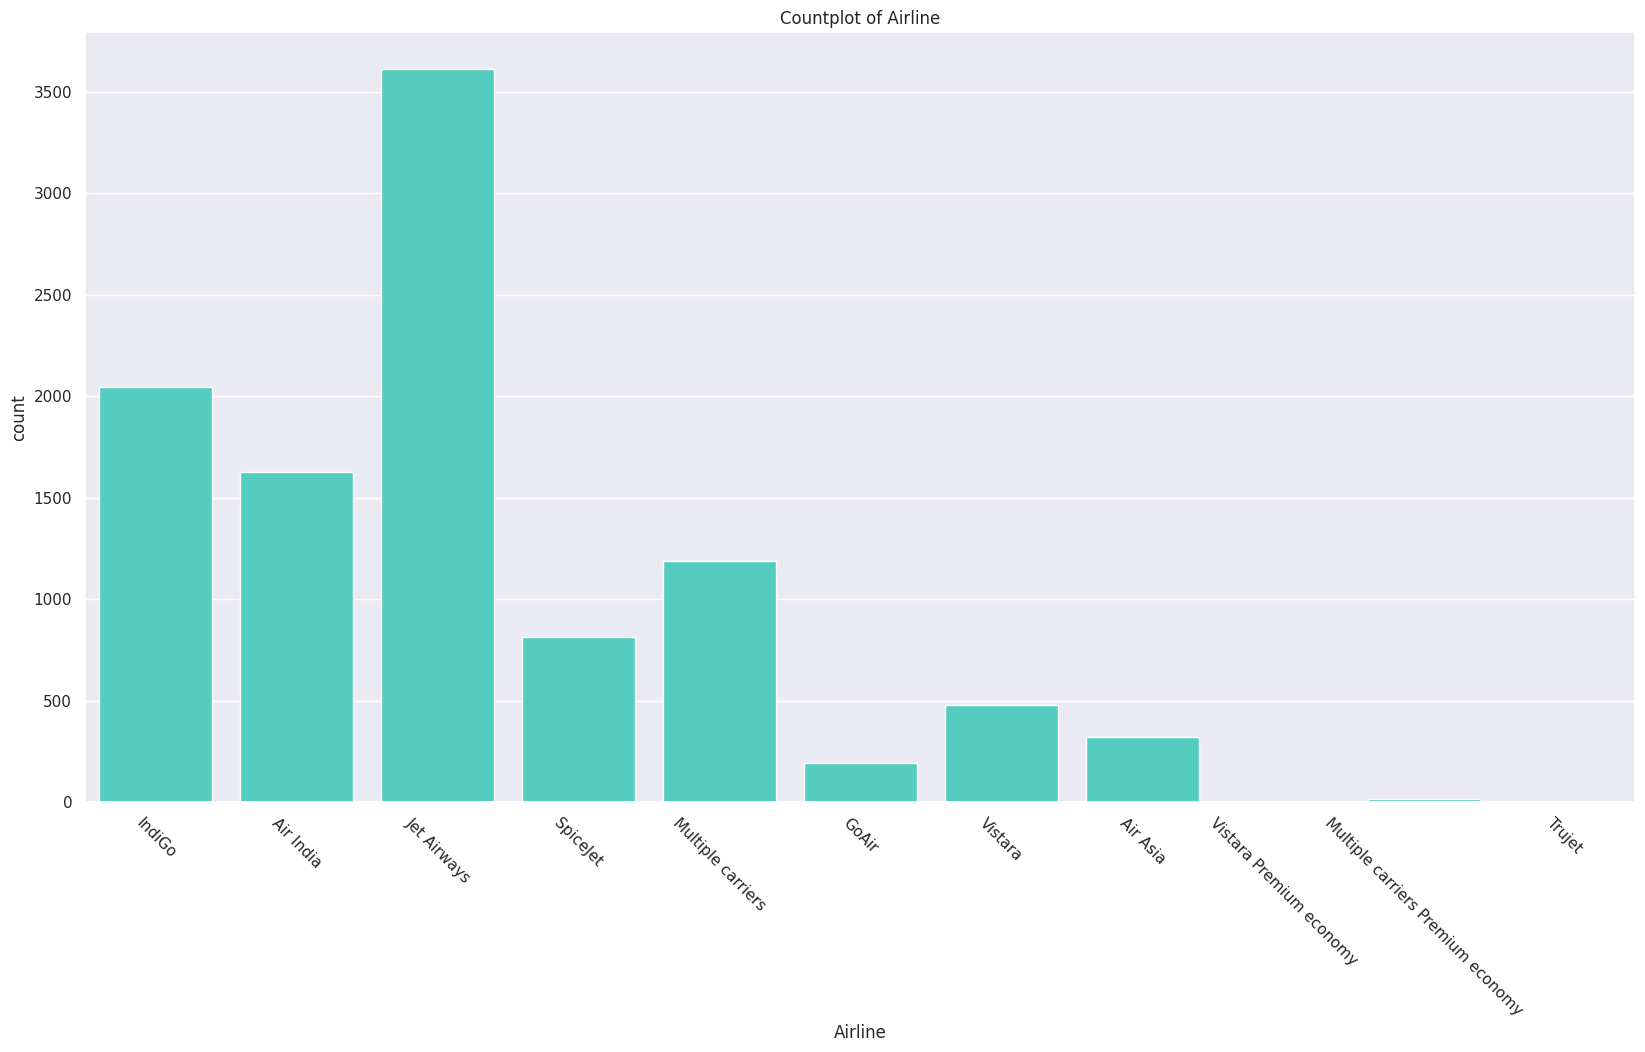

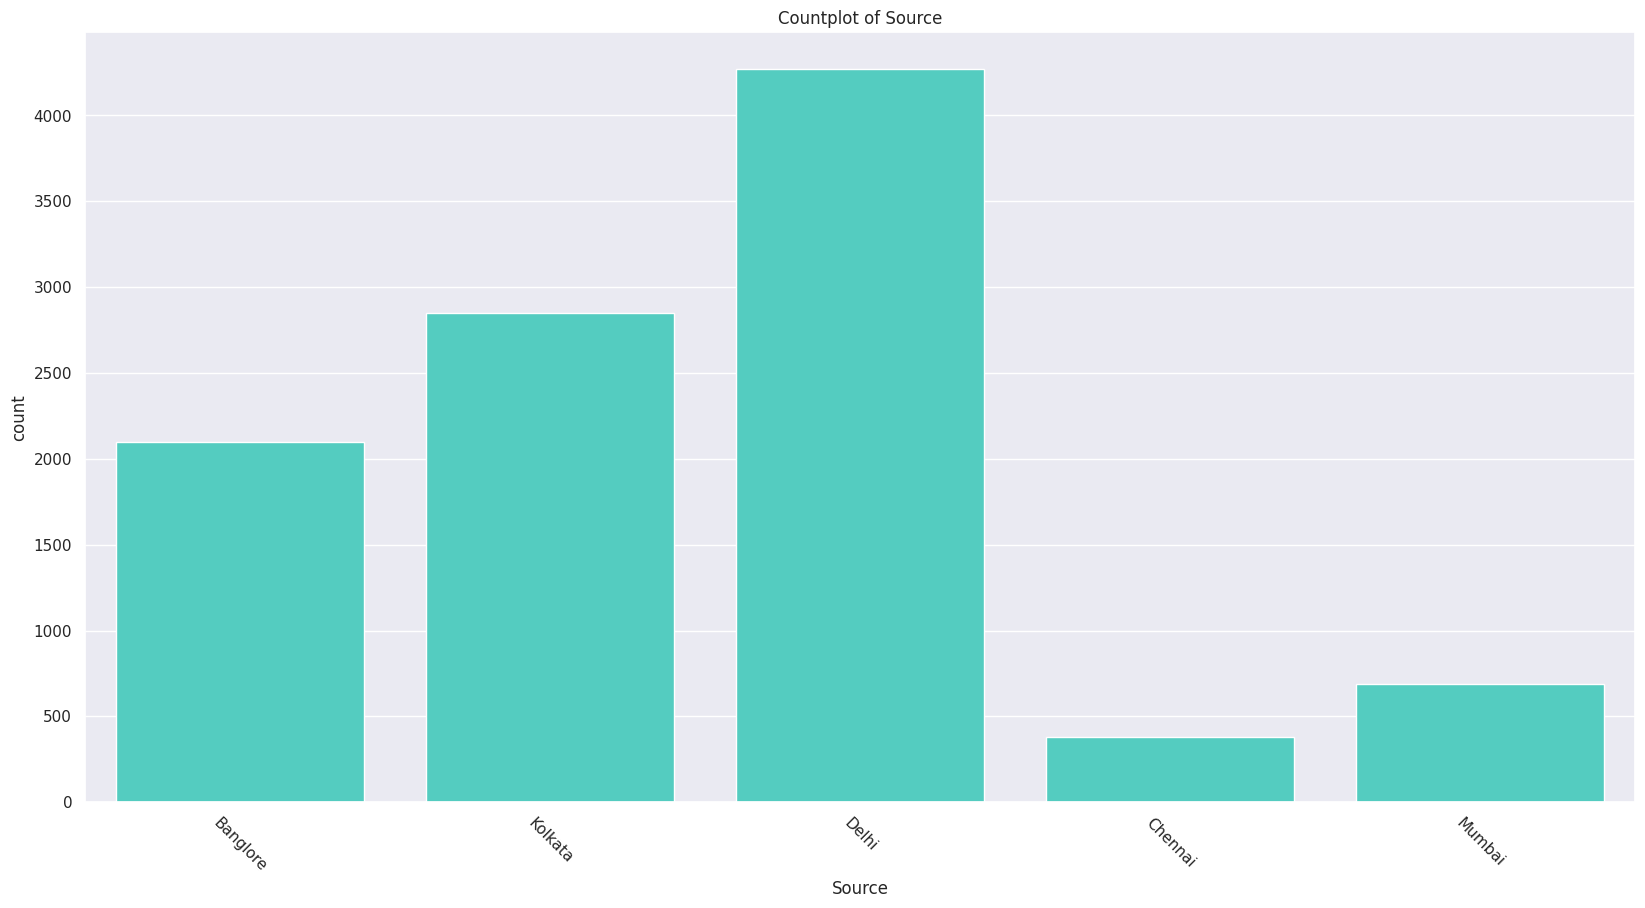

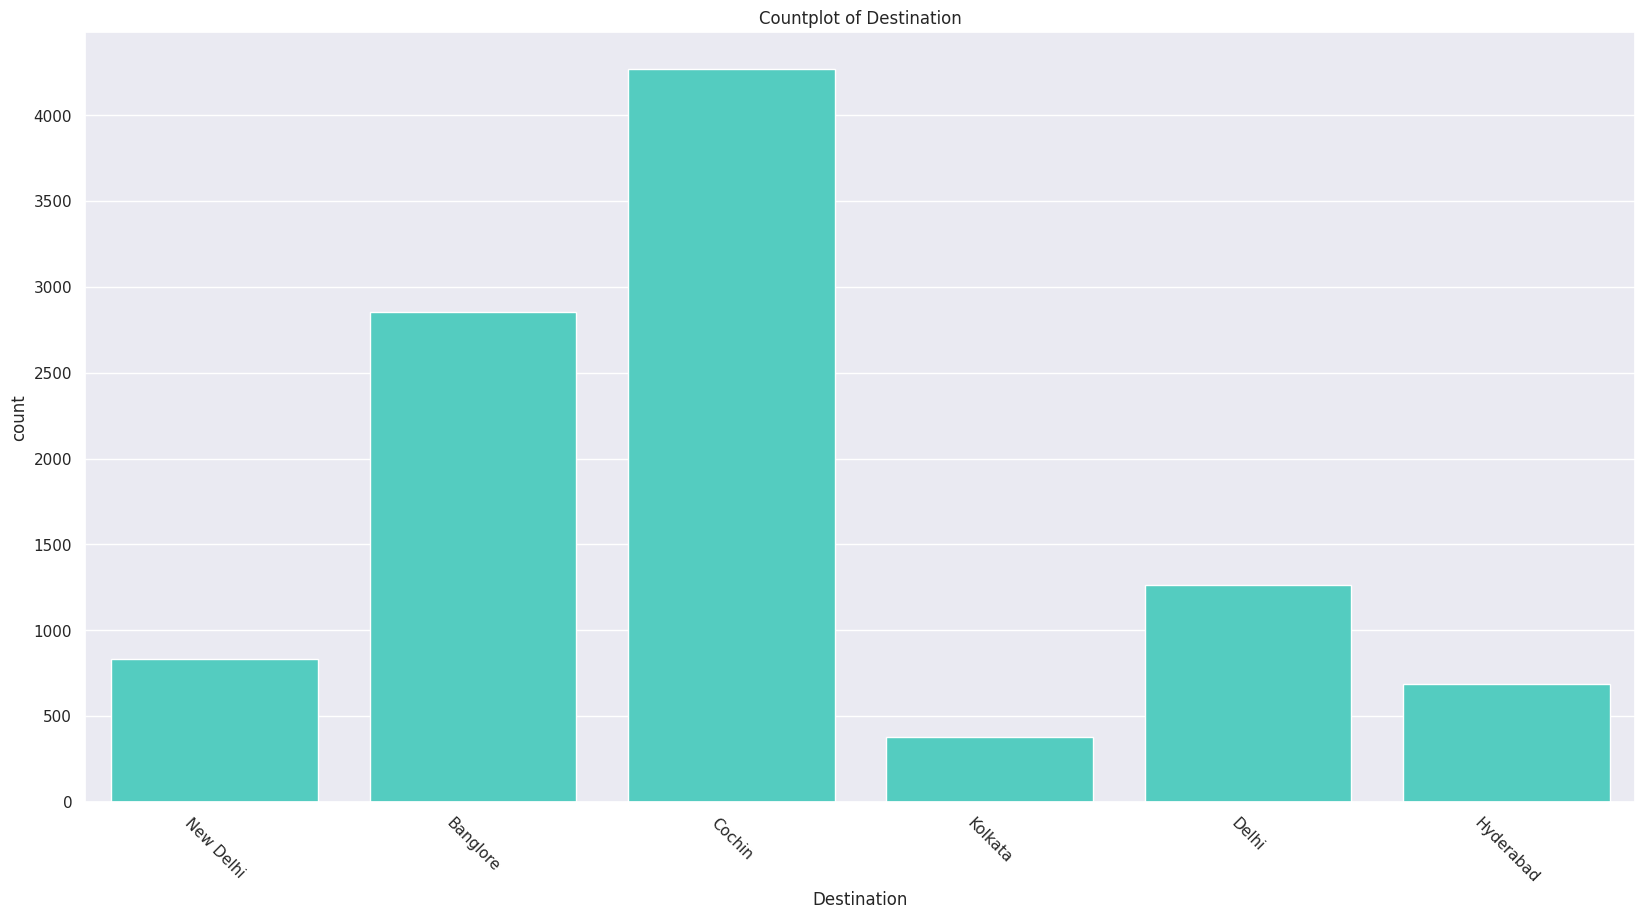

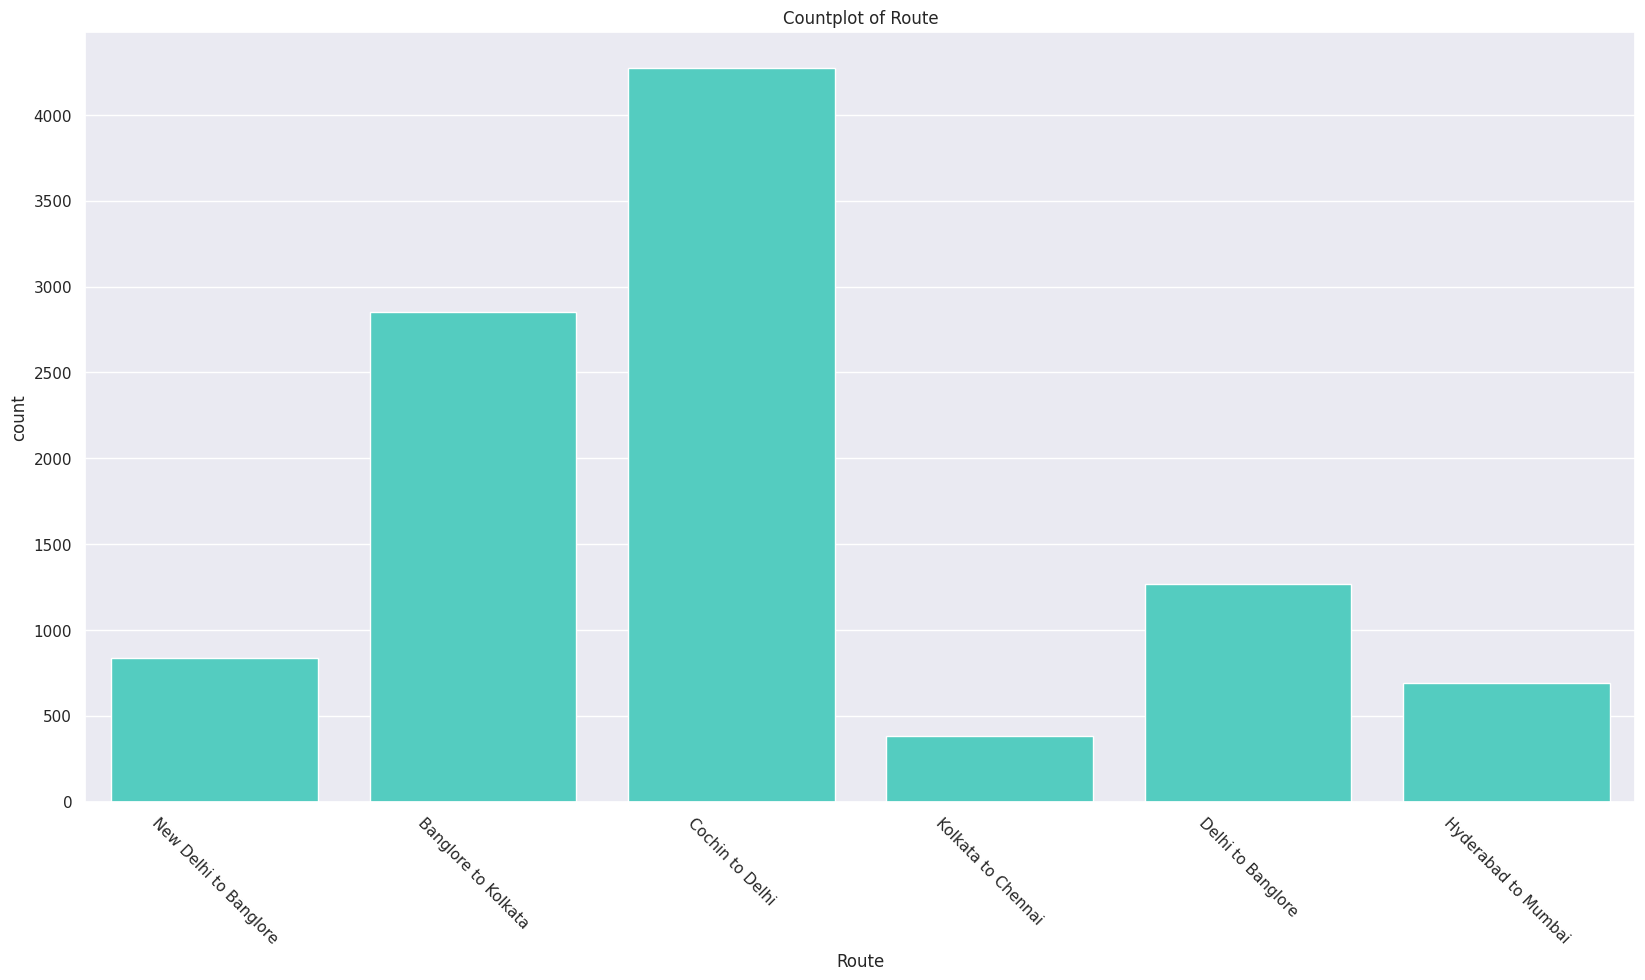

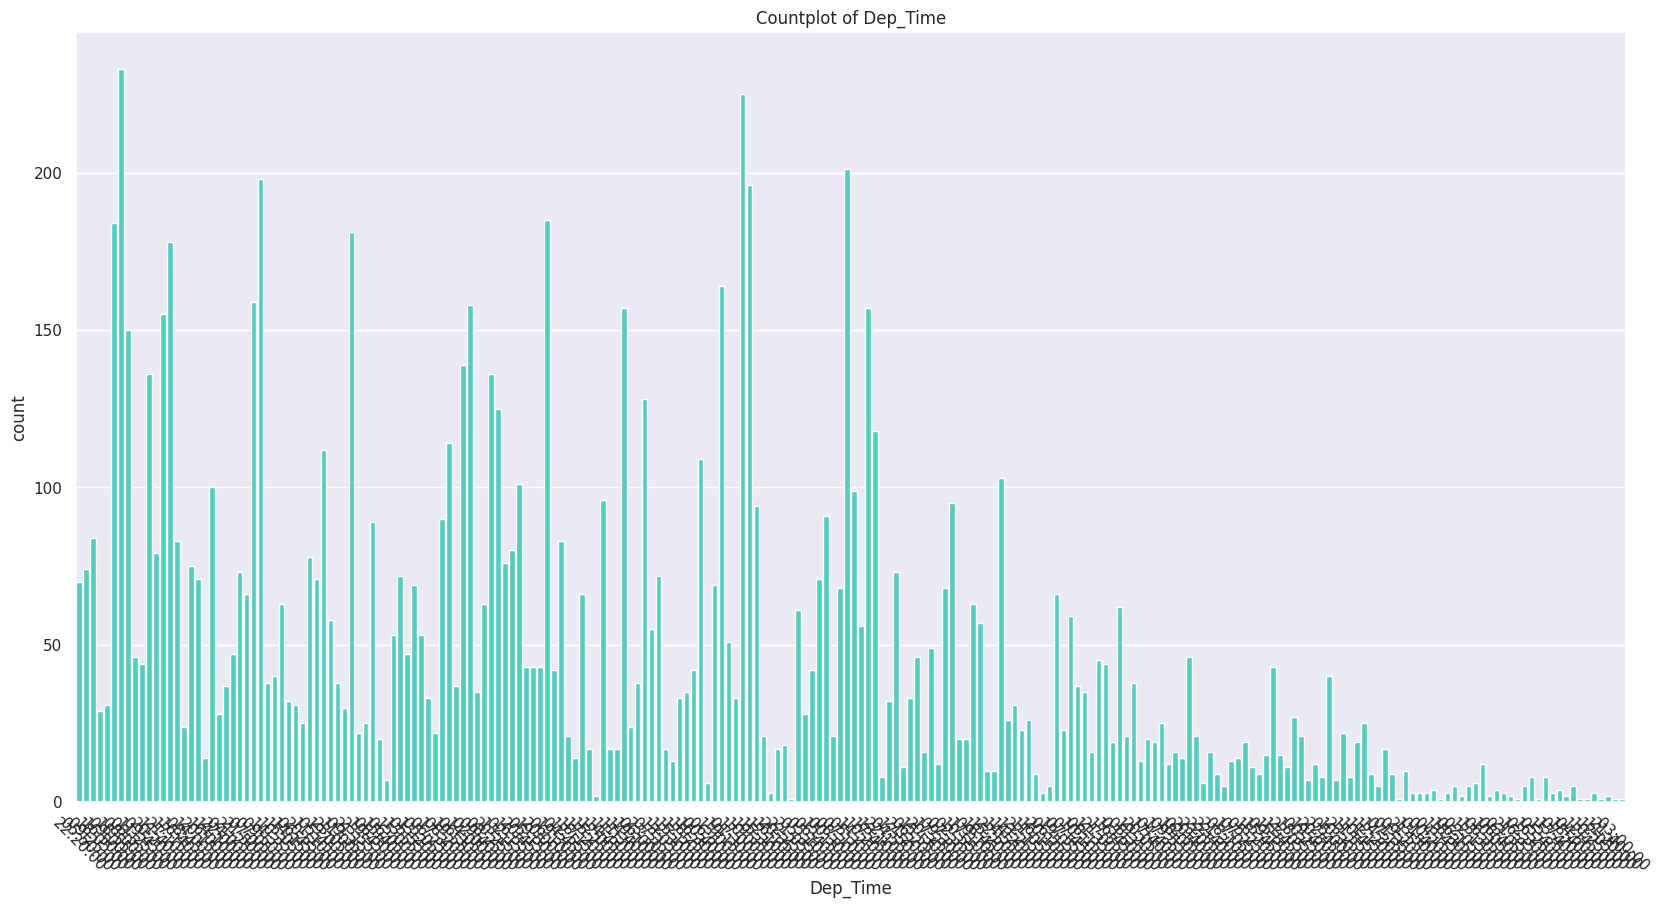

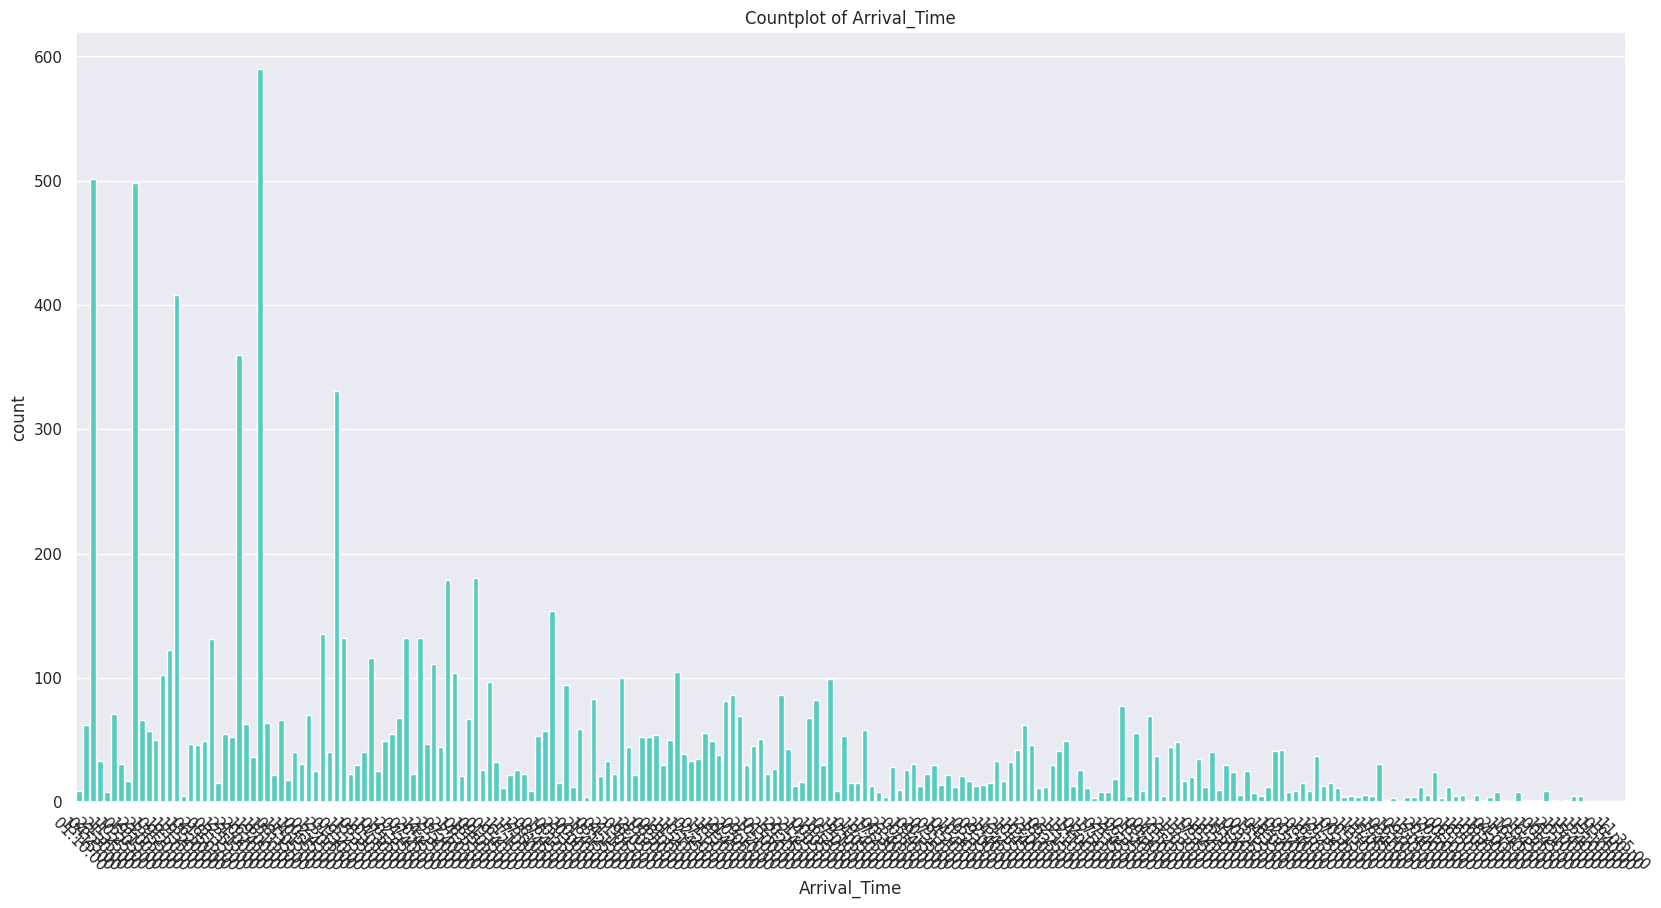

In [163]:
for col in category:
  plt.figure(figsize=(20,10))
  sns.countplot(x=col,data=df,color='Turquoise')
  plt.title(f'Countplot of {col}')
  plt.xticks(rotation=-45)
  plt.show()

From the Above Data, It is found that Majority of Flights are from Jet Airways, i.e 3766

With only 1 Flight from Trujet

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

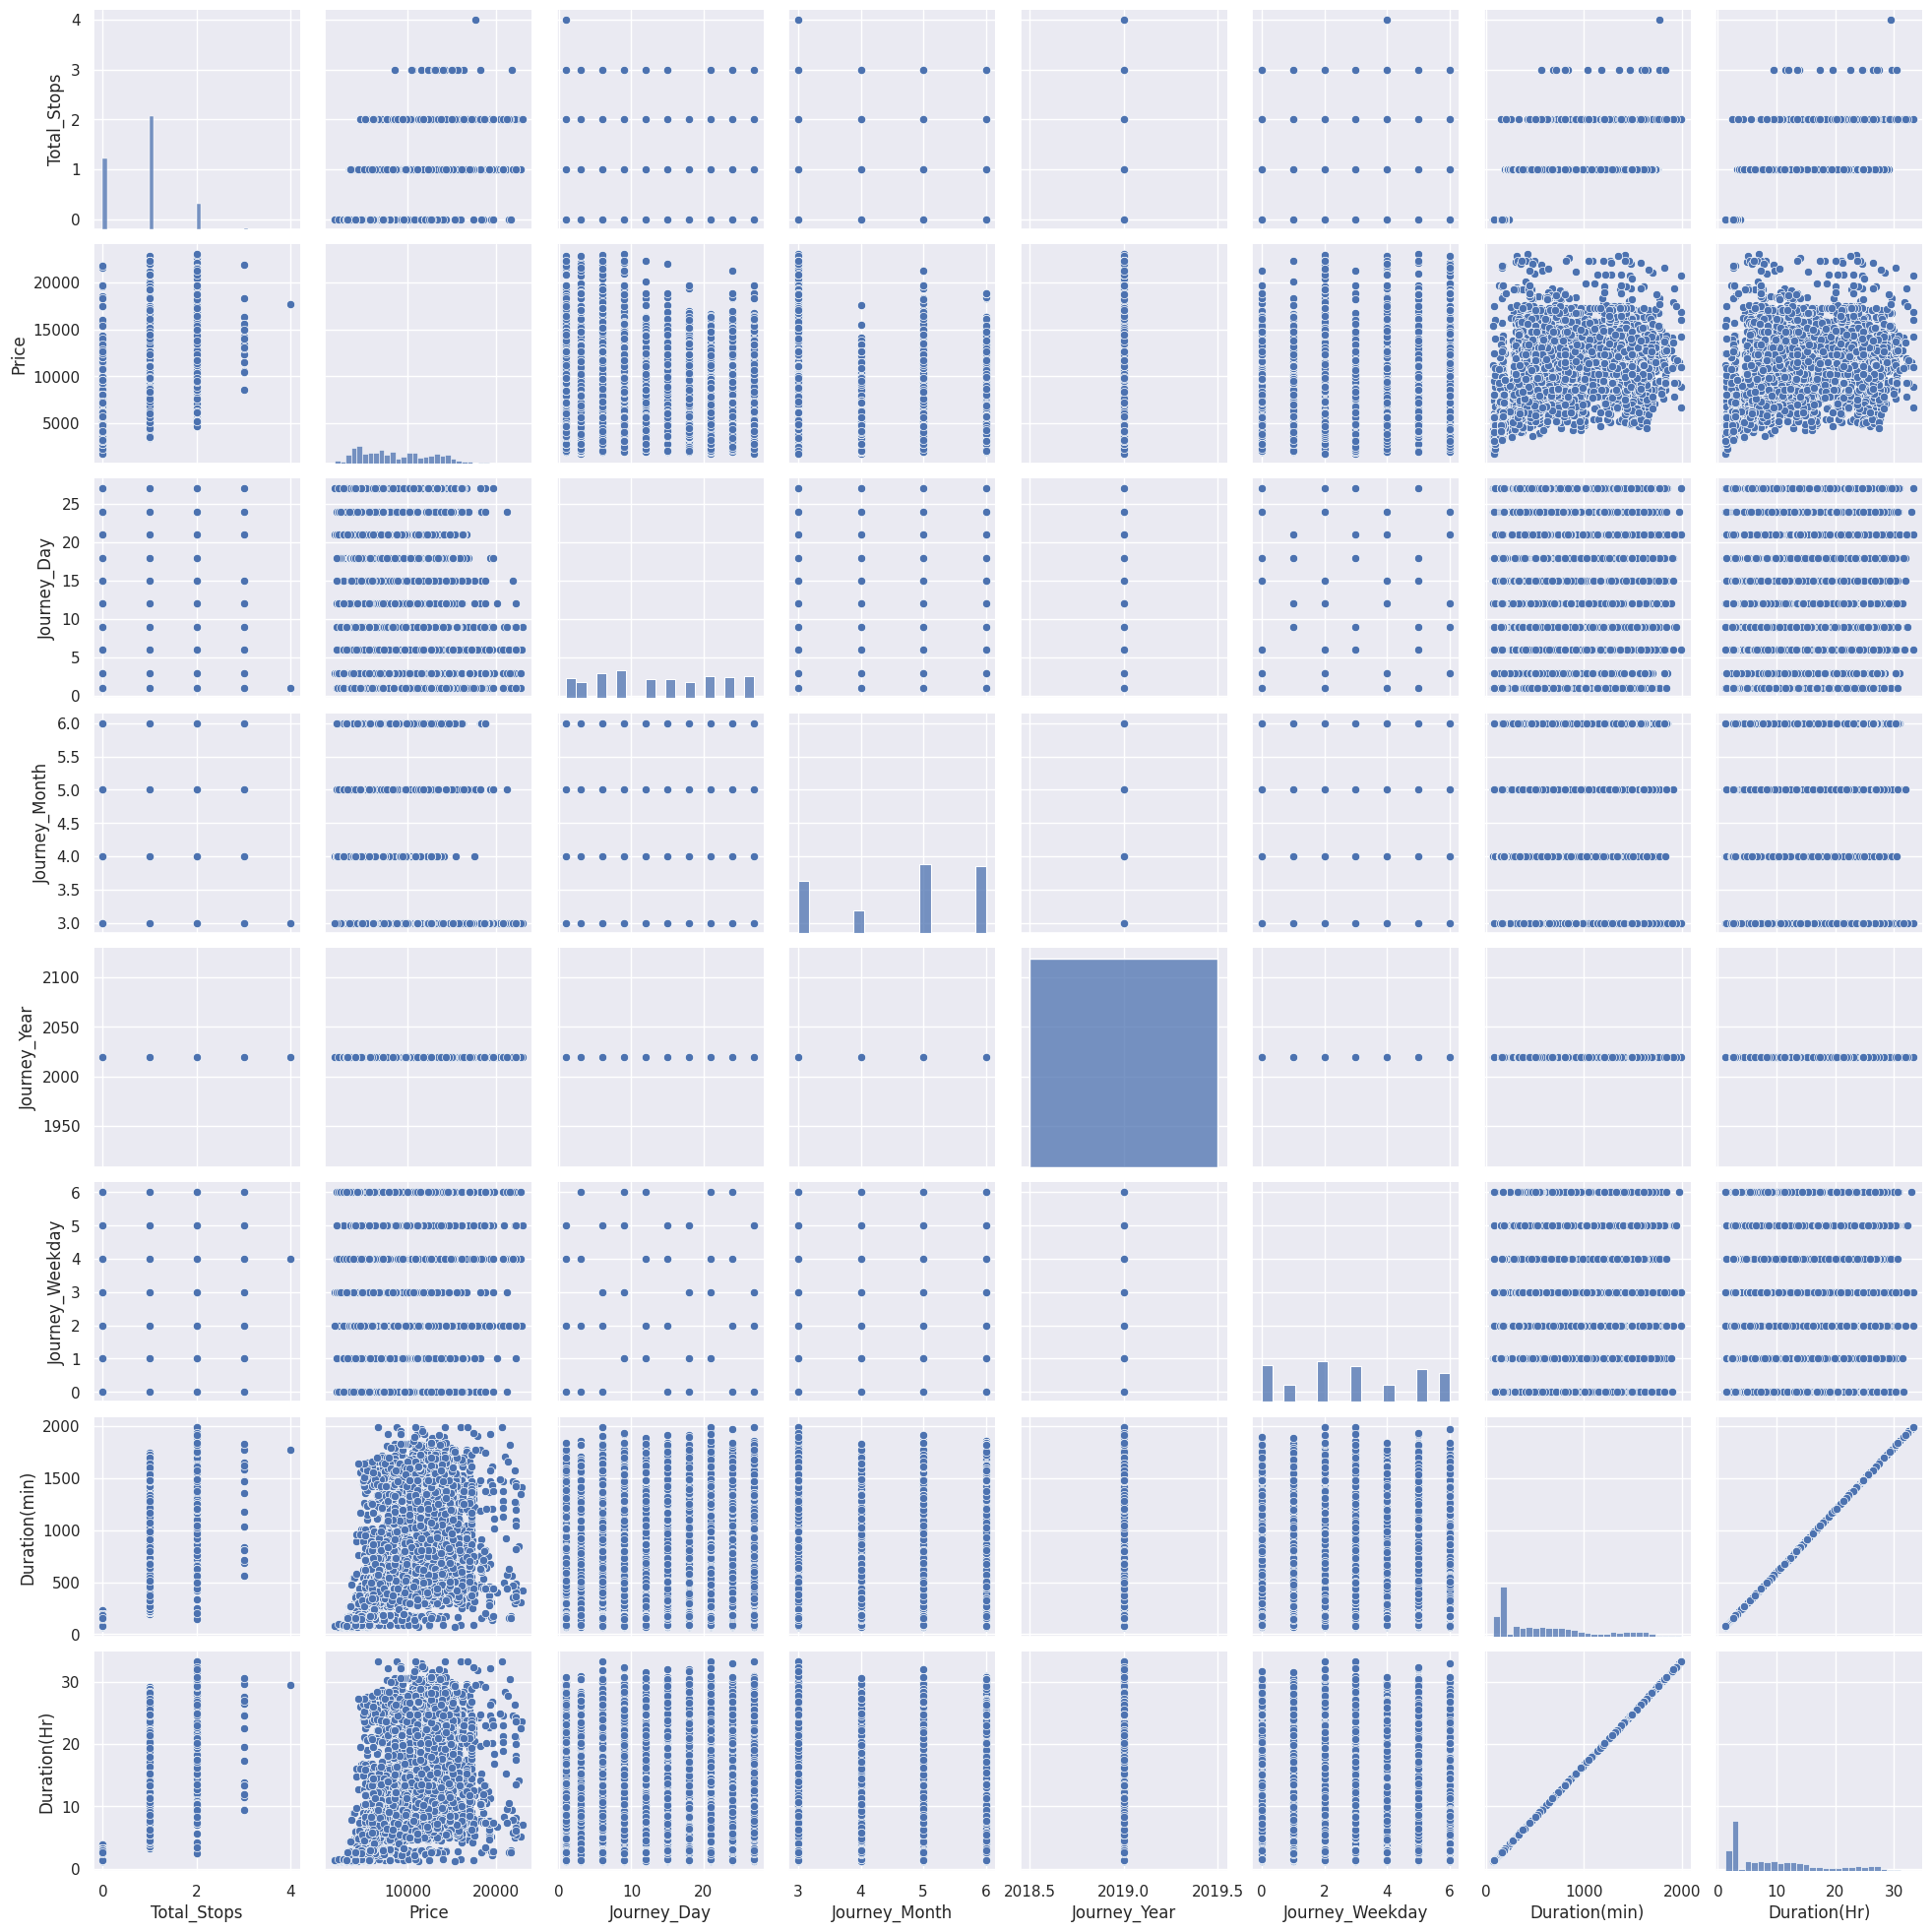

In [161]:
sns.pairplot(df,palette='rocket')

In [29]:
df['Airline'].value_counts()

Airline
Jet Airways                          3766
IndiGo                               2053
Air India                            1684
Multiple carriers                    1186
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [164]:
average=df.groupby('Airline').agg({'Price':'mean'}).sort_values('Price',ascending=False)
average


Price
Airline                                        
Multiple carriers Premium economy  11418.846154
Jet Airways                        11279.514531
Multiple carriers                  10750.907251
Air India                           9337.058354
Vistara Premium economy             8962.333333
Vistara                             7801.355649
GoAir                               5861.056701
IndiGo                              5668.469897
Air Asia                            5590.260188
SpiceJet                            4312.584767
Trujet                              4140.000000

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Multiple carriers'),
  Text(6, 0, 'Multiple carriers Premium economy'),
  Text(7, 0, 'SpiceJet'),
  Text(8, 0, 'Trujet'),
  Text(9, 0, 'Vistara'),
  Text(10, 0, 'Vistara Premium economy')])

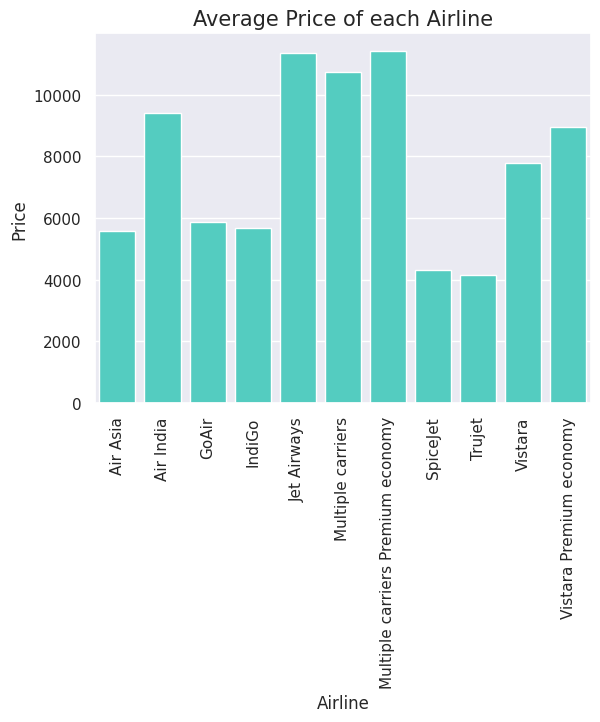

In [31]:
sns.barplot(x='Airline',y='Price',data=average,color='turquoise')
plt.title('Average Price of each Airline',fontsize=15)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Multiple carriers'),
  Text(6, 0, 'Multiple carriers Premium economy'),
  Text(7, 0, 'SpiceJet'),
  Text(8, 0, 'Trujet'),
  Text(9, 0, 'Vistara'),
  Text(10, 0, 'Vistara Premium economy')])

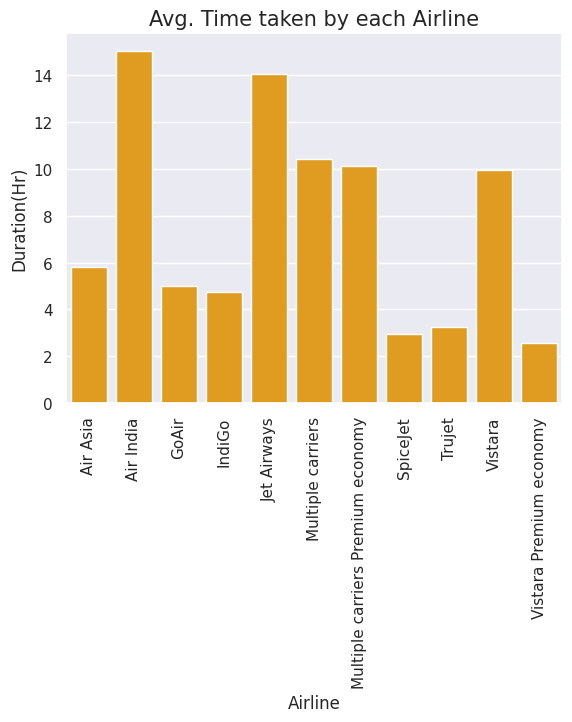

In [32]:
avgdurationhr=df.groupby('Airline').agg({'Duration(Hr)':'mean'})
avgdurationhr
sns.barplot(x='Airline',y='Duration(Hr)',data=avgdurationhr,color='Orange')
plt.title('Avg. Time taken by each Airline',fontsize=15)
plt.xticks(rotation=90)

<ipython-input-33-30cca67e74ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Journey_Month',y='Price',data=avgprice_month,palette='rocket')


([0, 1, 2, 3],
 [Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')])

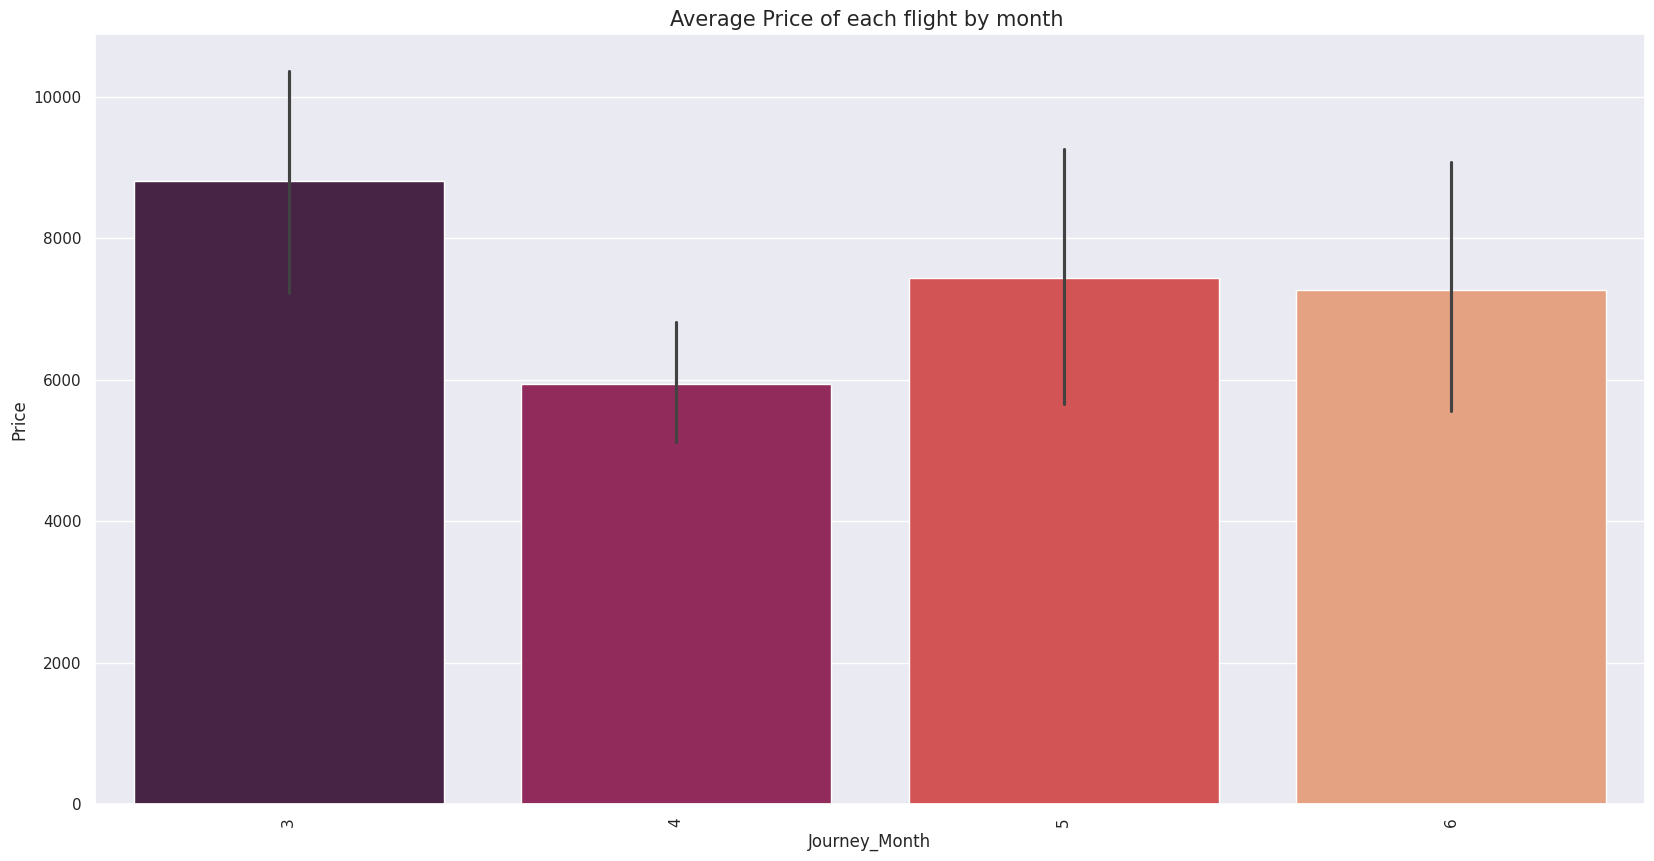

In [33]:
avgprice_month=df.groupby(['Journey_Month','Airline']).agg({'Price':'mean'})
avgprice_month

plt.figure(figsize=(20,10))
sns.barplot(x='Journey_Month',y='Price',data=avgprice_month,palette='rocket')
plt.title('Average Price of each flight by month ',fontsize=15)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Delhi to Banglore'),
  Text(1, 0, 'Banglore to Kolkata'),
  Text(2, 0, 'Cochin to Delhi'),
  Text(3, 0, 'Kolkata to Chennai'),
  Text(4, 0, 'Delhi to Banglore'),
  Text(5, 0, 'Hyderabad to Mumbai')])

<Figure size 2000x1000 with 0 Axes>

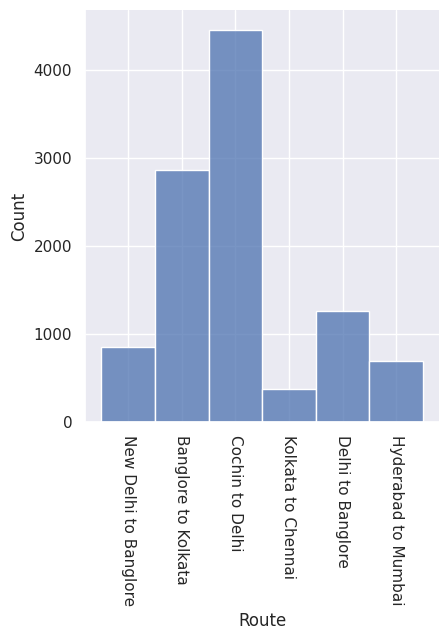

In [34]:
plt.figure(figsize=(20,10))
sns.displot(df['Route'])
plt.xticks(rotation=-90)

From the Above Data, it is found that , Majority of flights are Going from Cochin to Delhi, with Least going from kolkata to Chennai

34.5

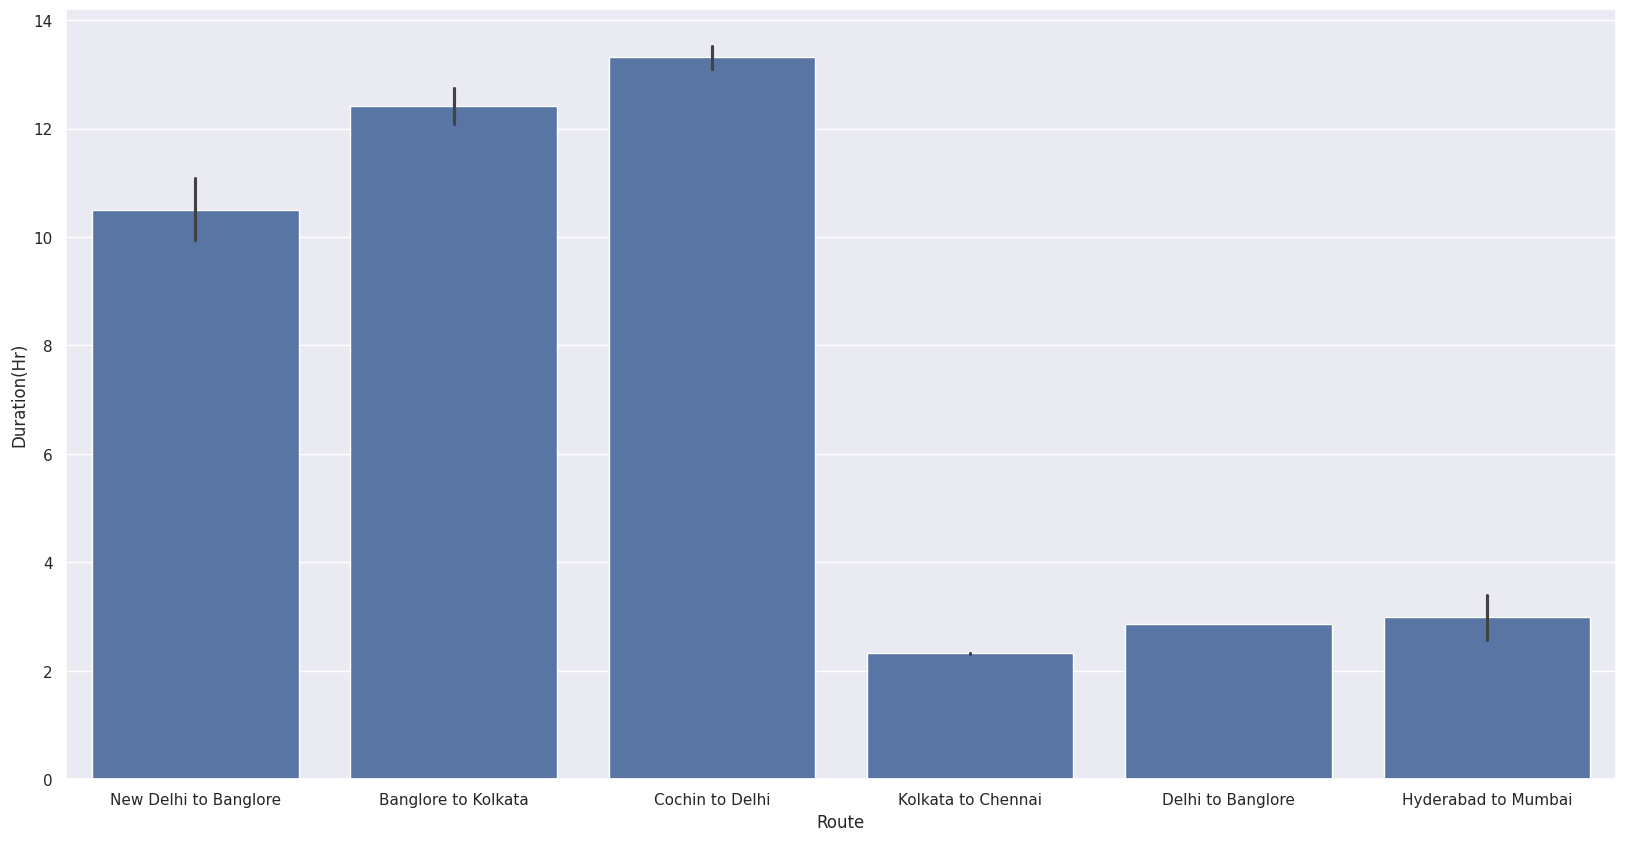

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x='Route',y='Duration(Hr)',data=df)
df['Duration(Hr)'].max()

34.5

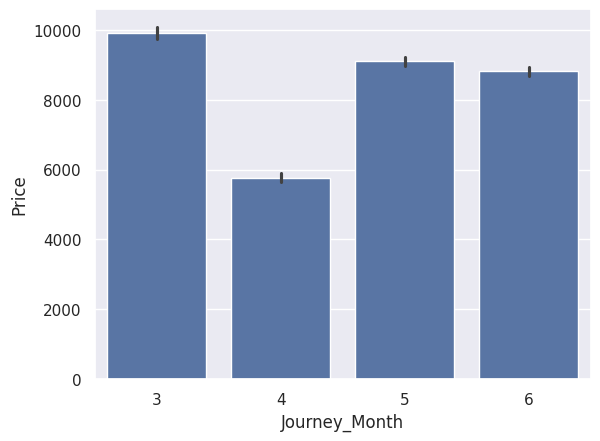

In [36]:
sns.barplot(x='Journey_Month',y='Price',data=df)
df['Duration(Hr)'].max()

1.

In [37]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi  New Delhi to Banglore   
1    Air India      2019-05-01   Kolkata    Banglore    Banglore to Kolkata   
2  Jet Airways      2019-06-09     Delhi      Cochin        Cochin to Delhi   
3       IndiGo      2019-05-12   Kolkata    Banglore    Banglore to Kolkata   
4       IndiGo      2019-03-01  Banglore   New Delhi  New Delhi to Banglore   

   Dep_Time Arrival_Time  Total_Stops  Price  Journey_Day  Journey_Month  \
0  22:20:00     01:10:00            0   3897           24              3   
1  05:50:00     13:15:00            2   7662            1              5   
2  09:25:00     04:25:00            2  13882            9              6   
3  18:05:00     23:30:00            1   6218           12              5   
4  16:50:00     21:35:00            1  13302            1              3   

   Journey_Year  Journey_Weekday  Duration(min)  Duration(Hr)  
0          2019                6            170      2.833333  
1          2019                2            445      7.416667  
2          2019                6           1140     19.000000  
3          2019                6            325      5.416667  
4          2019                4            285      4.750000

<ipython-input-38-02973f96ba91>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Airline',palette='Grn',data=df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

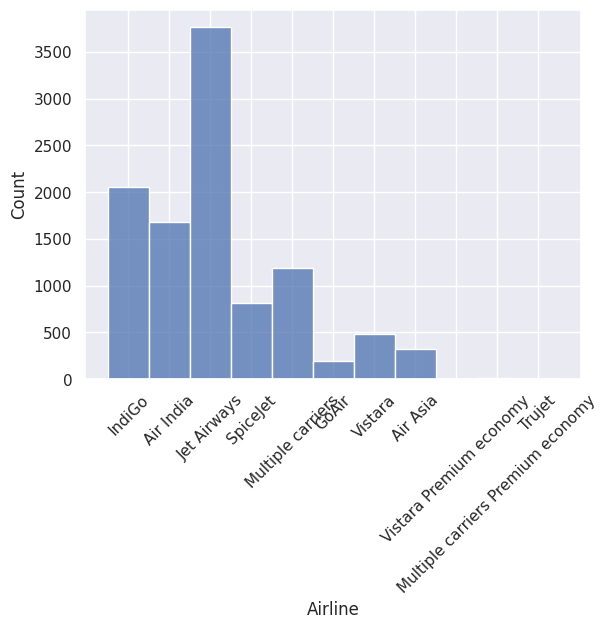

In [38]:
sns.histplot(x='Airline',palette='Grn',data=df)
plt.xticks(rotation=45)

In [39]:
dfjetairway=df.query('Airline=="Jet Airways"')
dfIndigo=df.query('Airline=="IndiGo"')
dfAirIndia=df.query('Airline=="Air India"')
dfSpiceJet=df.query('Airline=="SpiceJet"')
dfAirAsia=df.query('Airline=="Air Asia"')
dfVistara=df.query('Airline=="Vistara"')
dfGoAir=df.query('Airline=="GoAir"')
dfMultiple=df.query('Airline=="Multiple carriers"')
dfIndigo.head()

Airline Date_of_Journey    Source Destination                  Route  \
0   IndiGo      2019-03-24  Banglore   New Delhi  New Delhi to Banglore   
3   IndiGo      2019-05-12   Kolkata    Banglore    Banglore to Kolkata   
4   IndiGo      2019-03-01  Banglore   New Delhi  New Delhi to Banglore   
11  IndiGo      2019-04-18   Kolkata    Banglore    Banglore to Kolkata   
14  IndiGo      2019-04-24   Kolkata    Banglore    Banglore to Kolkata   

    Dep_Time Arrival_Time  Total_Stops  Price  Journey_Day  Journey_Month  \
0   22:20:00     01:10:00            0   3897           24              3   
3   18:05:00     23:30:00            1   6218           12              5   
4   16:50:00     21:35:00            1  13302            1              3   
11  20:20:00     22:55:00            0   4174           18              4   
14  17:15:00     19:50:00            0   4804           24              4   

    Journey_Year  Journey_Weekday  Duration(min)  Duration(Hr)  
0           2019                6            170      2.833333  
3           2019                6            325      5.416667  
4           2019                4            285      4.750000  
11          2019                3            155      2.583333  
14          2019                2            155      2.583333

In [40]:
plt.figure(figsize=(10,15))
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=df)

<Axes: xlabel='Price', ylabel='Duration(min)'>

In [41]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfSpiceJet)

<Axes: xlabel='Price', ylabel='Duration(min)'>

In [42]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfVistara)

<Axes: xlabel='Price', ylabel='Duration(min)'>

<Axes: xlabel='Price', ylabel='Duration(min)'>

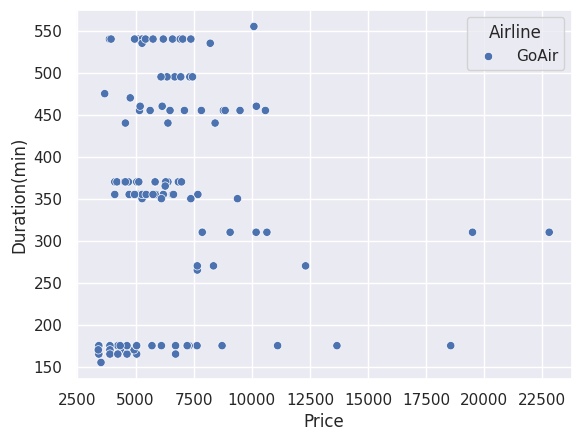

In [43]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfGoAir)

In [44]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfMultiple)

<Axes: xlabel='Price', ylabel='Duration(min)'>

In [45]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfjetairway)

<Axes: xlabel='Price', ylabel='Duration(min)'>

<Axes: xlabel='Price', ylabel='Duration(min)'>

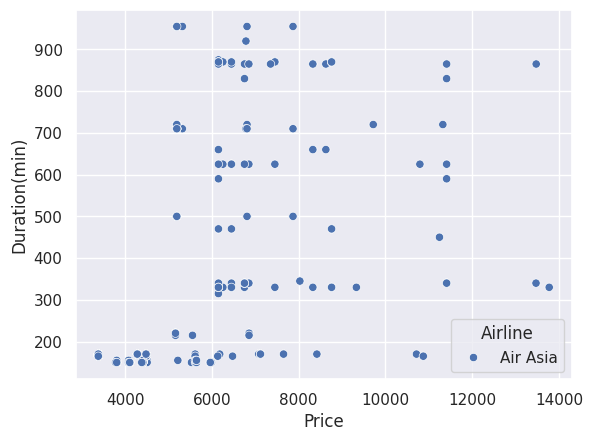

In [46]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfAirAsia)


In [47]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfIndigo)

<Axes: xlabel='Price', ylabel='Duration(min)'>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10515 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10515 non-null  object        
 1   Date_of_Journey  10515 non-null  datetime64[ns]
 2   Source           10515 non-null  object        
 3   Destination      10515 non-null  object        
 4   Route            10515 non-null  object        
 5   Dep_Time         10515 non-null  object        
 6   Arrival_Time     10515 non-null  object        
 7   Total_Stops      10515 non-null  int64         
 8   Price            10515 non-null  int64         
 9   Journey_Day      10515 non-null  int32         
 10  Journey_Month    10515 non-null  int32         
 11  Journey_Year     10515 non-null  int32         
 12  Journey_Weekday  10515 non-null  int32         
 13  Duration(min)    10515 non-null  int64         
 14  Duration(Hr)     10515 non-null  float64   

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(y='Duration(min)',x='Route',hue='Airline',data=df)

<Axes: xlabel='Route', ylabel='Duration(min)'>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10515 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10515 non-null  object        
 1   Date_of_Journey  10515 non-null  datetime64[ns]
 2   Source           10515 non-null  object        
 3   Destination      10515 non-null  object        
 4   Route            10515 non-null  object        
 5   Dep_Time         10515 non-null  object        
 6   Arrival_Time     10515 non-null  object        
 7   Total_Stops      10515 non-null  int64         
 8   Price            10515 non-null  int64         
 9   Journey_Day      10515 non-null  int32         
 10  Journey_Month    10515 non-null  int32         
 11  Journey_Year     10515 non-null  int32         
 12  Journey_Weekday  10515 non-null  int32         
 13  Duration(min)    10515 non-null  int64         
 14  Duration(Hr)     10515 non-null  float64   

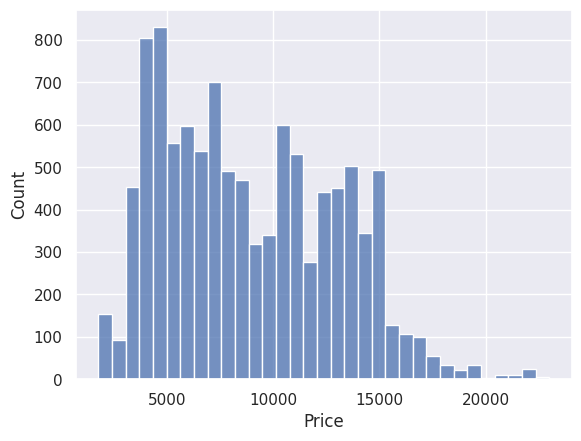

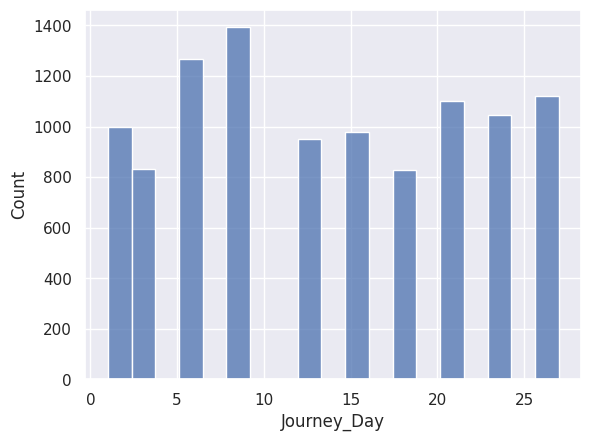

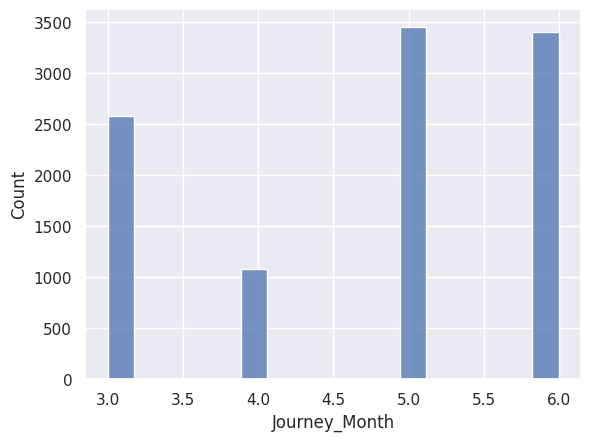

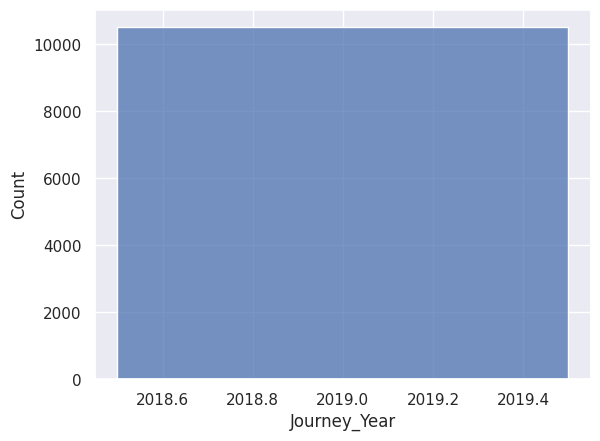

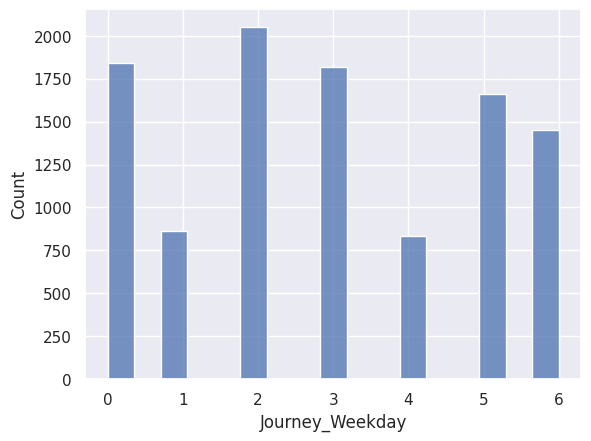

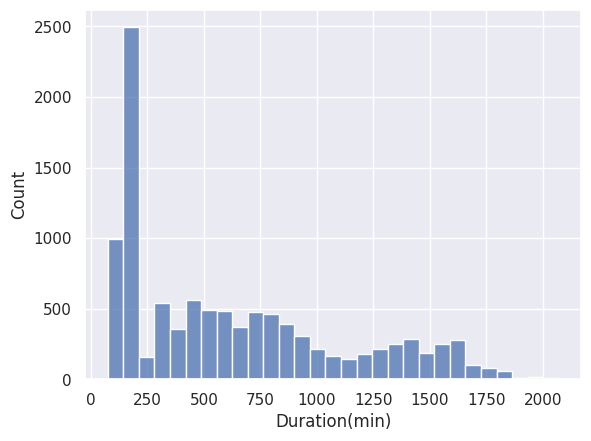

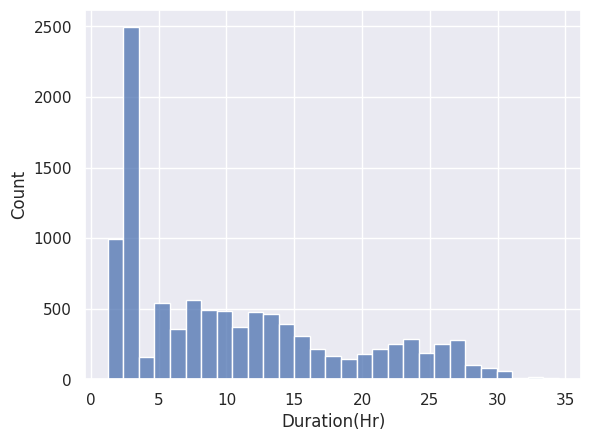

In [81]:
for col in Numerical:
  sns.histplot(df[col])
  plt.show()

# Data Transformation

In [212]:
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Route']=le.fit_transform(df['Route'])
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df.head()


Airline Date_of_Journey  Source  Destination  Route  Dep_Time Arrival_Time  \
0        3      2019-03-24       0            5      5  22:20:00     01:10:00   
1        1      2019-05-01       3            0      0  05:50:00     13:15:00   
2        4      2019-06-09       2            1      1  09:25:00     04:25:00   
3        3      2019-05-12       3            0      0  18:05:00     23:30:00   
4        3      2019-03-01       0            5      5  16:50:00     21:35:00   

   Total_Stops  Price  Journey_Day  Journey_Month  Journey_Year  \
0          NaN   3897           24              3          2019   
1          NaN   7662            1              5          2019   
2          NaN  13882            9              6          2019   
3          NaN   6218           12              5          2019   
4          NaN  13302            1              3          2019   

   Journey_Weekday  Duration(min)  Duration(Hr)  
0                6            170      2.833333  
1                2            445      7.416667  
2                6           1140     19.000000  
3                6            325      5.416667  
4                4            285      4.750000